In [2]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Gaussian import Gaussian_compute_tradeoff_curve
from analysis.tradeoff_Laplace import Laplace_compute_tradeoff_curve

from mech.GaussianDist import *
from classifier.kNN import train_kNN_model

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    handlers=[
        logging.FileHandler("/../log/tradeoff-kNN-Gaussian.log")
        # logging.StreamHandler()
    ]
)

dim = 1
kwargs = generate_params(num_train_samples = 100000, num_test_samples = 100000)
classifier_args = {
    "name" : "kNN"
}
estimator = GaussianDistEstimator(kwargs)

In [10]:
eta_values = np.linspace(0.01, 5, 500)
alpha_values_thm, beta_values_thm = Gaussian_compute_tradeoff_curve(eta_values)

In [11]:
output = estimator.build(eta = eta_values, nworkers=50)

2024-11-26 12:07:12,527 Generating samples...
2024-11-26 12:07:12,538 Generated 100000 testing samples and 100000 training samples in 0.0099 seconds
2024-11-26 12:07:12,538 Estimating using kNN classifier
2024-11-26 12:07:13,064 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,072 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,080 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,087 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,094 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,102 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,109 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,120 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,136 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,153 use the optimized one dimensional KNN algorithm
2024-11-26 12:07:13,160 use the optimized one dimensional KNN algorithm
202

In [12]:
alpha_values_estimate = output["alpha"]

beta_values_estimate = output["beta"]

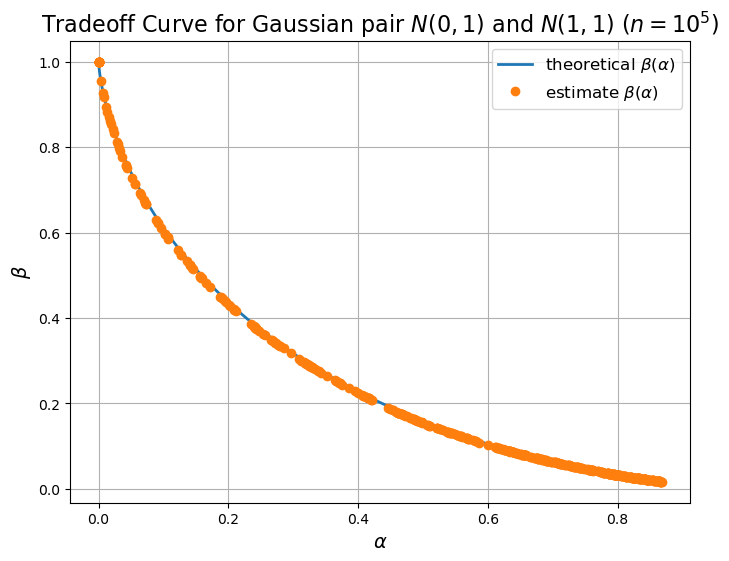

In [16]:
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(alpha_values_thm, beta_values_thm, label=r"theoretical $\beta(\alpha)$", linewidth=2)
plt.plot(alpha_values_estimate, beta_values_estimate, label=r"estimate $\beta(\alpha)$", linestyle='none', marker='o', linewidth=2)
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14)
plt.title(r"Tradeoff Curve for Gaussian pair $N(0,1)$ and $N(1, 1)$ ($n=10^5$)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(os.getcwd()+"/../fig/tradeoff_Gaussian_105.png", bbox_inches = 'tight', dpi = 300);
plt.show()

In [14]:
os.getcwd()

'/home/wei402/Desktop/fdp-estimation/notebook'

In [19]:
beta_values_estimate

[array([1., 1.]),
 array([1.     , 0.91332]),
 array([0.85092, 0.80424]),
 array([0.75232, 0.69494]),
 array([0.64474, 0.60918]),
 array([0.57568, 0.53926]),
 array([0.51034, 0.47848]),
 array([0.43212, 0.41598]),
 array([0.3763, 0.362 ]),
 array([0.34066, 0.32784]),
 array([0.3113, 0.291 ]),
 array([0.26  , 0.2569]),
 array([0.25434, 0.24262]),
 array([0.23372, 0.22634]),
 array([0.19346, 0.18766]),
 array([0.16264, 0.15758]),
 array([0.15548, 0.1495 ]),
 array([0.14248, 0.14022]),
 array([0.139  , 0.12686]),
 array([0.12082, 0.12316]),
 array([0.11034, 0.11036]),
 array([0.1059 , 0.10032]),
 array([0.09544, 0.09182]),
 array([0.08866, 0.08774]),
 array([0.07956, 0.0793 ]),
 array([0.07694, 0.0744 ]),
 array([0.07148, 0.07242]),
 array([0.06754, 0.06432]),
 array([0.06748, 0.06416]),
 array([0.06012, 0.06086]),
 array([0.05532, 0.0517 ]),
 array([0.05354, 0.048  ]),
 array([0.04652, 0.04978]),
 array([0.04688, 0.04514]),
 array([0.04132, 0.04718]),
 array([0.03904, 0.03898]),
 array([